In [1]:
import os
import cv2
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Öncelikle matplotlib kütüphanes ile resimlerin gösterilmesi 
üzerinde çalışma yapıyorum.

In [2]:
# çalışılan klasörün yolunu veriri
# gets working directory absolute path
print(os.getcwd())

c:\Users\muss\Desktop\My GitHub Repos\Python-Mini-Projects\ImageProcessingExercises\Project01


In [3]:
def divide_chunk(list, n):
    return (list[i:i+n] for i in range(0, len(list), n))

In [4]:
# yolların olduğu klasörün yolu belirtilir
roadImagePath = "roads"
# klasörün içindeki tüm dosyların isimleri
roadImages = os.listdir(roadImagePath)
print("Klasördeki dosya sayisi : ", len(roadImages))
# diziyi 25'er lik gruplara bölmek
roadImages = list(divide_chunk(roadImages, 27))
print("Klasördeki dosyalar : ", list(roadImages))

Klasördeki dosya sayisi :  289
Klasördeki dosyalar :  [['umm_000000.png', 'umm_000001.png', 'umm_000002.png', 'umm_000003.png', 'umm_000004.png', 'umm_000005.png', 'umm_000006.png', 'umm_000007.png', 'umm_000008.png', 'umm_000009.png', 'umm_000010.png', 'umm_000011.png', 'umm_000012.png', 'umm_000013.png', 'umm_000014.png', 'umm_000015.png', 'umm_000016.png', 'umm_000017.png', 'umm_000018.png', 'umm_000019.png', 'umm_000020.png', 'umm_000021.png', 'umm_000022.png', 'umm_000023.png', 'umm_000024.png', 'umm_000025.png', 'umm_000026.png'], ['umm_000027.png', 'umm_000028.png', 'umm_000029.png', 'umm_000030.png', 'umm_000031.png', 'umm_000032.png', 'umm_000033.png', 'umm_000034.png', 'umm_000035.png', 'umm_000036.png', 'umm_000037.png', 'umm_000038.png', 'umm_000039.png', 'umm_000040.png', 'umm_000041.png', 'umm_000042.png', 'umm_000043.png', 'umm_000044.png', 'umm_000045.png', 'umm_000046.png', 'umm_000047.png', 'umm_000048.png', 'umm_000049.png', 'umm_000050.png', 'umm_000051.png', 'umm_0

In [13]:
def detect_line(imgPath):
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    meanFilter = np.ones((5,5))/15
    convolutionImage = scipy.ndimage.convolve(gray_image, meanFilter)
    canny_image = cv2.Canny(convolutionImage, 100, 200)
    image_heigth = image.shape[0]
    image_width = image.shape[1]
    region_of_interest_vertices = [
        (0, image_heigth),
        (image_width/2, image_heigth/2),
        (image_width, image_heigth)
    ]
    mask = np.zeros_like(canny_image)
    match_mask_color = 255
    cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32), match_mask_color)
    masked_image = cv2.bitwise_and(canny_image, mask)
    lines = cv2.HoughLinesP(masked_image,
                        rho=2,
                        theta=np.pi/60,
                        threshold=130,
                        lines=np.array([]),
                        minLineLength=100,
                        maxLineGap=25)
    img = np.copy(image)
    blank_image = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
    for line in lines:
        # coordinates of lines
        for x1, y1, x2, y2 in line:

            # çizgi kontrolü
            

            cv2.line(blank_image,   # resmin üzerinde yazılacak
                    (x1, y1),       # çizginin başlangıç koordinatı
                    (x2, y2),       # çizginin ikinci koordinatı
                    (0,255,0),      # çizgi rengi
                    thickness=4)    # kalınlığı
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img        


In [14]:
def plot_images(listOfImage, row=9, col=3, limit=1):
    numberOfFigure = 1
    for count, imgList in enumerate(listOfImage):
        fig = plt.figure(num=count+1, figsize=(12, 12)) # grafiğin genişlik ve yüksekliği belirlenir
        for count, img in enumerate(imgList):
            img = detect_line(os.path.join(roadImagePath, img))
            
            oImg = np.asarray(img)
            fig.add_subplot(row, col, (count+1)%(row*col+1))
            plt.imshow(oImg)
        plt.show()
        if(numberOfFigure >= limit):
            break
        numberOfFigure += 1

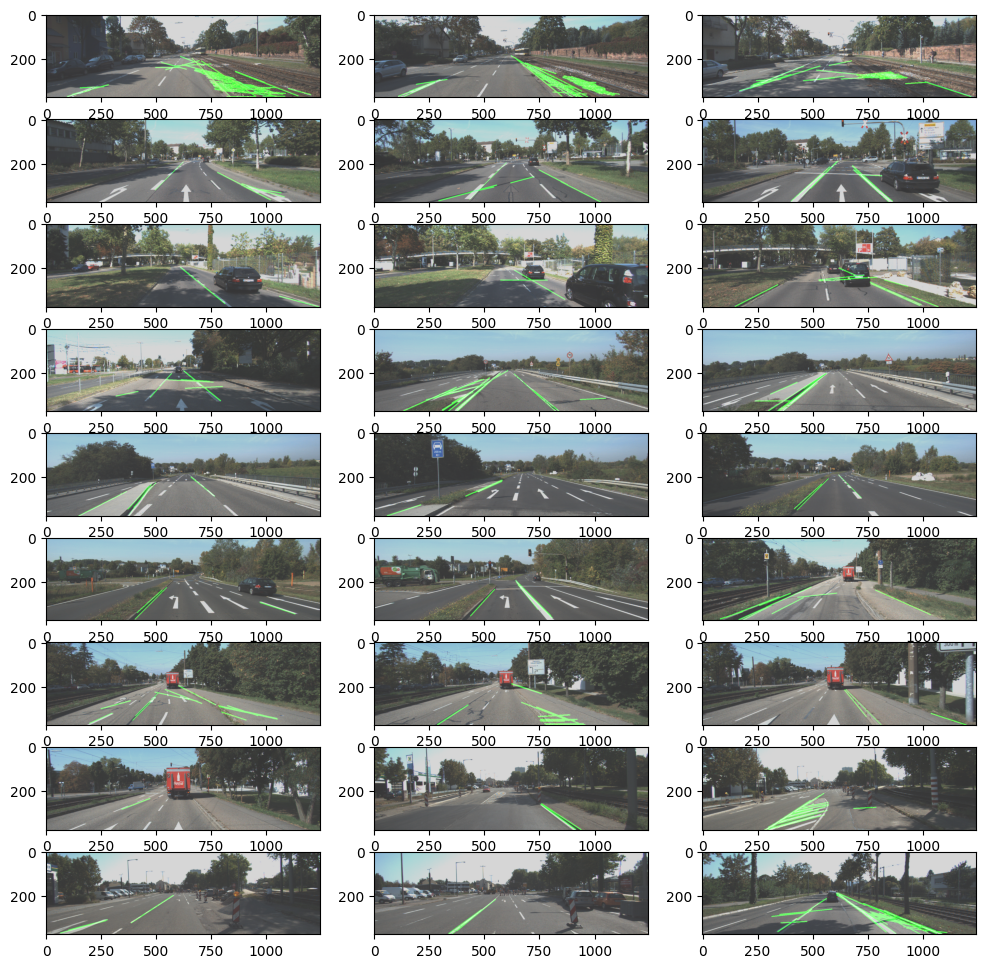

In [15]:
plot_images(roadImages)

In [11]:
def plot_images_hsv(listOfImage, row=9, col=3, limit=1):
    numberOfFigure = 1
    for count, imgList in enumerate(listOfImage):
        fig = plt.figure(num=count+1, figsize=(12, 12)) # grafiğin genişlik ve yüksekliği belirlenir
        for count, img in enumerate(imgList):
            oImg = cv2.imread(os.path.join(roadImagePath, img))
            oImg = cv2.cvtColor(oImg, cv2.COLOR_BGR2HSV_FULL)
            
            oImg = np.asarray(oImg)
            fig.add_subplot(row, col, (count+1)%(row*col+1))
            plt.imshow(oImg)
        plt.show()
        if(numberOfFigure >= limit):
            break
        numberOfFigure += 1

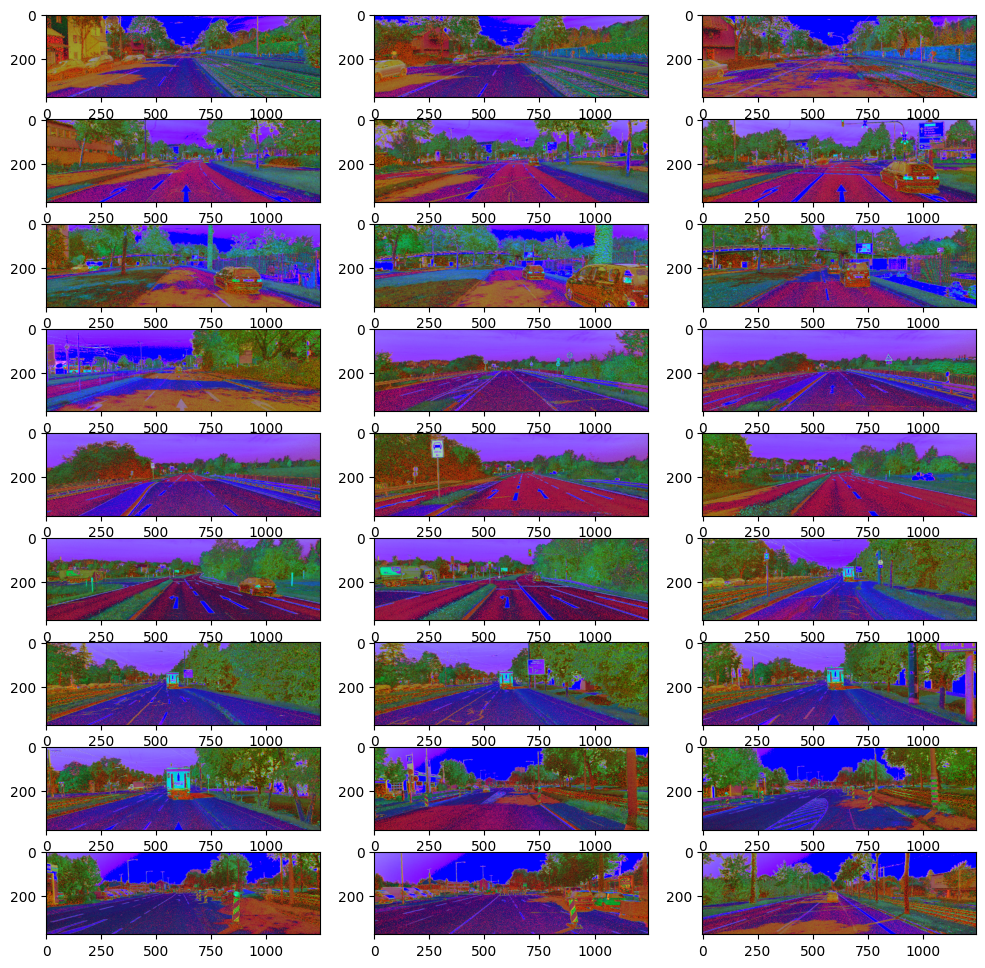

In [12]:
plot_images_hsv(roadImages)